In [1]:
# import all the necessary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
# read in all the datasets
listings = pd.read_csv('./listings.csv')
calendar = pd.read_csv('./calendar.csv.gz', compression='gzip')

In [25]:
calendar.shape

(18540540, 7)

In [4]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,7,48,2019-11-04,0.38,2,339
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,313,2020-02-23,4.71,1,151
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.59,1,0
4,5114,Super Room in Great area.,7345,Yasmine,Manhattan,Lower East Side,40.71910,-73.99040,Private room,94,1,75,2012-06-09,0.56,3,109


In [5]:
listings.shape

(50796, 16)

In [6]:
calendar.shape

(18540540, 7)

In [7]:
# rename the id in the listings dataframe to listing_id
listings.rename(columns ={'id': 'listing_id'}, inplace = True)

# merge listings and calendar
df = pd.merge(listings, calendar, on = 'listing_id')

# convert the available column to a binary column called booked
df['booked'] = np.where(df['available']=='f', 1, 0)

df.head()

,listing_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_x,...,reviews_per_month,calculated_host_listings_count,availability_365,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights,booked
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.9379,Private room,100,...,0.01,1,365,2020-03-14,t,$100.00,$100.00,1,730,0
1,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.9379,Private room,100,...,0.01,1,365,2020-03-15,t,$100.00,$100.00,1,730,0
2,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.9379,Private room,100,...,0.01,1,365,2020-03-16,t,$100.00,$100.00,1,730,0
3,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.9379,Private room,100,...,0.01,1,365,2020-03-17,t,$100.00,$100.00,1,730,0
4,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.9379,Private room,100,...,0.01,1,365,2020-03-18,t,$100.00,$100.00,1,730,0


In [8]:
# Drop duplicate columns and other columns not relevant to the exploratory analysis
df = df.drop(columns=['name', 'host_name', 'latitude', 'longitude', 'last_review', 'price_y', 
                      'adjusted_price', 'minimum_nights_y'])

# check for na values
df.isnull().any()

listing_id                        False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
room_type                         False
price_x                           False
minimum_nights_x                  False
number_of_reviews                 False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
date                              False
available                         False
maximum_nights                    False
booked                            False
dtype: bool

In [9]:
# create new month and year columns from the date column
df['month'] = pd.DatetimeIndex(df['date']).month_name()
df['year'] = pd.DatetimeIndex(df['date']).year

df.head()

,listing_id,host_id,neighbourhood_group,neighbourhood,room_type,price_x,minimum_nights_x,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,available,maximum_nights,booked,month,year
0,2060,2259,Manhattan,Washington Heights,Private room,100,1,1,0.01,1,365,2020-03-14,t,730,0,March,2020
1,2060,2259,Manhattan,Washington Heights,Private room,100,1,1,0.01,1,365,2020-03-15,t,730,0,March,2020
2,2060,2259,Manhattan,Washington Heights,Private room,100,1,1,0.01,1,365,2020-03-16,t,730,0,March,2020
3,2060,2259,Manhattan,Washington Heights,Private room,100,1,1,0.01,1,365,2020-03-17,t,730,0,March,2020
4,2060,2259,Manhattan,Washington Heights,Private room,100,1,1,0.01,1,365,2020-03-18,t,730,0,March,2020


In [10]:
# How is listing price affected by location, and type of room
l_r_price = df.groupby(['neighbourhood_group', 'room_type'])['price_x'].mean().unstack()
l_r_price

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Bronx,133.637413,NaN,64.260184,81.563636
Brooklyn,178.552883,184.206897,76.021201,76.787529
Manhattan,247.406252,322.342262,198.091891,101.022727
Queens,149.046675,144.297297,69.551412,86.294118
Staten Island,150.689840,NaN,62.768817,30.200000


In [11]:
# fill missing values with 0
l_r_price = l_r_price.fillna(0)

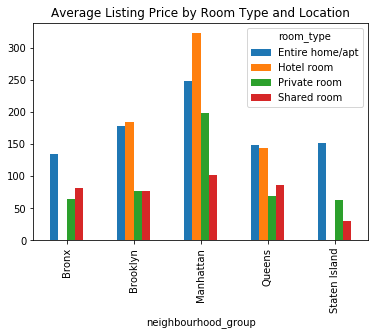

In [12]:
# bar plot showing how the average listing price varies from borough to borough
l_r_price.plot.bar();
plt.title("Average Listing Price by Room Type and Location");

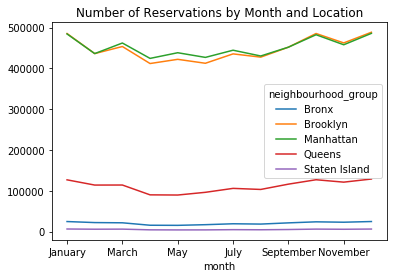

In [57]:
# calculate number of reservations by month and neighbourhood
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']

total_booking = df.groupby(['month', 'neighbourhood_group'])['booked'].sum().unstack().reindex(new_order, axis=0)

# bar plot showing how the average listing price varies from borough to borough
total_booking.plot(kind='line');
plt.title("Number of Reservations by Month and Location");

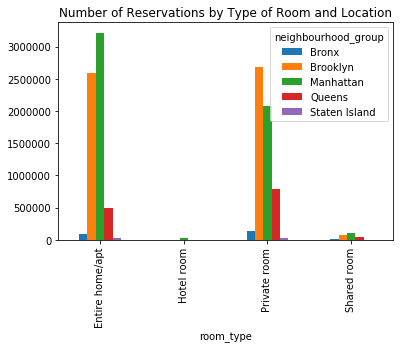

In [23]:
# How is the number of reservations affected by location, and type of room
reserv = df.groupby(['room_type','neighbourhood_group'])['booked'].sum().unstack()

# fill missing values with 0
reserv = reserv.fillna(0)

# bar plot showing how the average listing price varies from borough to borough
reserv.plot.bar();
plt.title("Number of Reservations by Type of Room and Location");

In [28]:
df.shape

(18540540, 17)

In [55]:
# Get bookings for every listing each month
bookings_listing = pd.DataFrame(df.groupby(['listing_id','neighbourhood_group','year', 'room_type',
                                            'price_x'])['booked'].sum()).reset_index()

# order the dataframe in the descending order using the booking column
bookings_listing = bookings_listing.sort_values(by=['booked'], ascending=False)

'''
since it's clear that the assigned dates are not accurate, the visualizations will be plotted without them. 

'''


"\nsince it's clear that the assigned dates are not accurate, the visualizations will be plotted without them. \n\n"

In [56]:
bookings_listing

,listing_id,neighbourhood_group,year,room_type,price_x,booked
50796,22227610,Brooklyn,2020,Private room,70,293
67570,30747515,Brooklyn,2020,Private room,35,293
39474,17915565,Manhattan,2020,Private room,95,293
85738,38774972,Brooklyn,2020,Private room,103,293
18036,7726296,Brooklyn,2020,Entire home/apt,115,293
...,...,...,...,...,...,...
31035,13669391,Bronx,2021,Entire home/apt,85,0
11749,4753866,Manhattan,2021,Private room,125,0
31037,13669423,Manhattan,2021,Entire home/apt,185,0
74425,34209440,Queens,2021,Private room,57,0


In [61]:
avail = df.groupby('year').available.value_counts()

In [62]:
avail

year  available
2020  f            9819897
      t            5063330
2021  f            2611919
      t            1045394
Name: available, dtype: int64